# Linear Regression - Class Exercise 1

## Introduction

In a marketing project, the marketing team needs to study how the expense on different media of advertisements impact the sales. 

We will use the "advertising" dataset for this exercise. This dataset contains 3 features, i.e. the expense on advertisements via TV, via radio and via newspaper.

Our goal is to build a linear regression model to predict the sales.

## Metadata (Data Dictionary)

| Variable | Data Type | Description |
|----------|-----------|-------------|
| TV | float | advertisement expense on TV |
| radio | float | advertisement expense on radio |
| newspaper | float | advertisement expense on newspaper |
| sales | float | Resulting sales |


## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import Data

<font color=red><b>Action</b>: Load the data file and check against the metadata.<font>

In [2]:
df = pd.read_csv('advertising.csv')
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


As we can see, there are 4 variables in this data file. "TV", "radio" and "newspaper" are the expenditure of advertisement on these channels and "sales" is the outcome of the advertisement campaign, hence it should be the label to predict.

## Exploratory Analysis

### Check the numeric summary of each column

<font color=red><b>Action</b>: Display the basic numeric summary.

In [3]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Check if there is any missing value

<font color=red><b>Action</b>: Determine the number of missing values in each column.

In [4]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

There is no missing value in any column.

### Create a scatter matrix

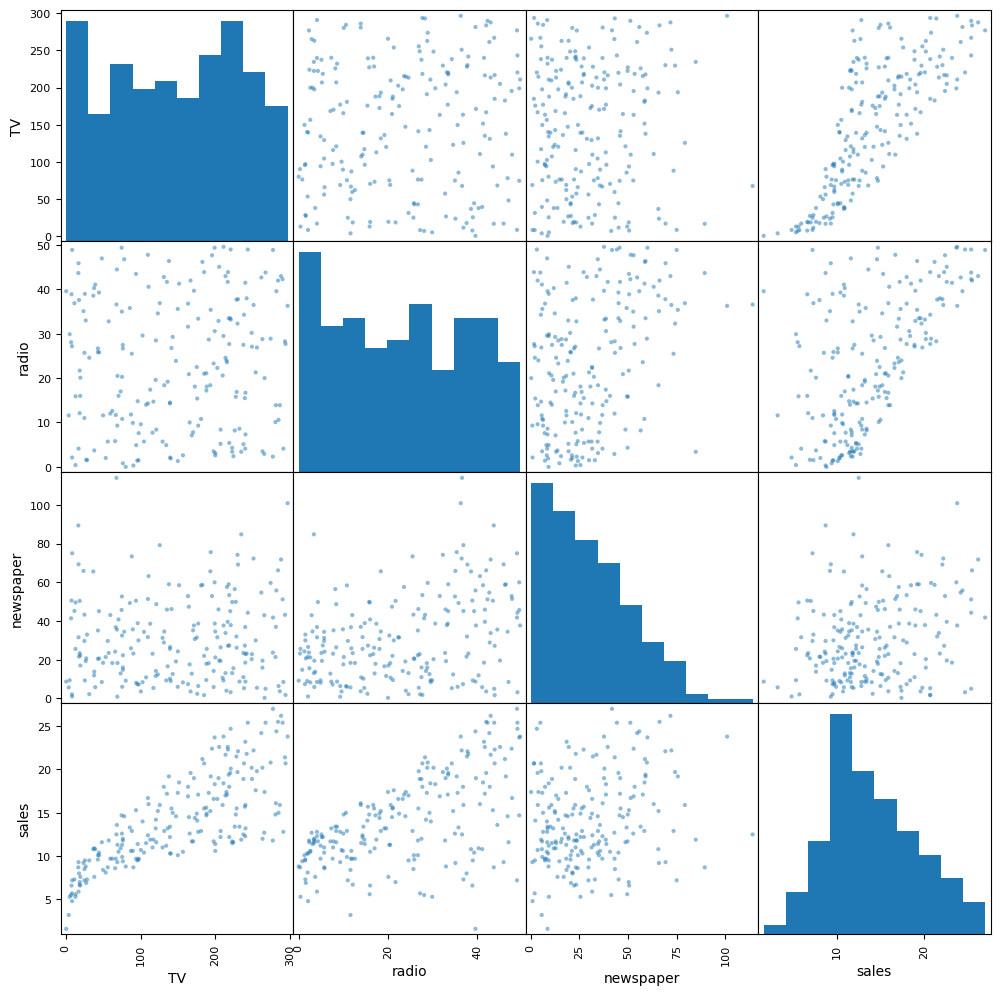

In [5]:
pd.plotting.scatter_matrix(df, figsize=(12, 12))
plt.show()

As our interest is the correlation between each feature and the label, we would primarily look at the last row.<br>
"TV" and "radio" have a positive correlation with "sales", while "newspaper" does not seem to have.

### Check for correlation coefficients

In [6]:
np.corrcoef(df.to_numpy().transpose())

array([[1.        , 0.05480866, 0.05664787, 0.78222442],
       [0.05480866, 1.        , 0.35410375, 0.57622257],
       [0.05664787, 0.35410375, 1.        , 0.22829903],
       [0.78222442, 0.57622257, 0.22829903, 1.        ]])

This matrix is plotted in the same orientation as the scatter matrix.<br>

Correlation between "TV" and "sales" = 0.78222<br>
Correlation between "radio" and "sales" = 0.57622<br>
Correlation between "newspaper" and "sales" = 0.22829

## Predictive Analysis

### Import <u>LinearRegression</u> from <u>sklearn</u> library

In [7]:
from sklearn.linear_model import LinearRegression

### Extract the features and the label

<font color=red><b>Action</b>: Extract the input features as a pandas.DataFrame object.<font>

In [8]:
x = df[['TV', 'radio', 'newspaper']]

<font color=red><b>Action</b>: Extract the output label as a pandas.Series object.<font>

In [8]:
y = df['sales']

### Initialize the model
We can simply use the default configuration in LinearRegression(). There is no input needed in the brackets.

<font color=red><b>Action</b>: Initialize a linear regression model.<font>

In [9]:
model = LinearRegression()

### Fit the model
We can use <font color=#AA0000><b>model.fit()</b></font> function to train the model using this simple command.<br>
This function takes 2 inputs: 1) the features in 2D-array; 2)the label in 1D array.<br>

It applies to almost (maybe all) models in sklearn library.

<font color=red><b>Action</b>: Train the model.<font>

In [10]:
model = model.fit(x, y)

### Predict the label
We can use <font color=#AA0000><b>model.predict()</b></font> function to make the prediction based on the input features.<br>
This function takes 1 input: the features in 2D array.

<font color=red><b>Action</b>: Predict the label.<font>

In [11]:
yhat = model.predict(x)

### Plot the predicted value (on y-axis) against the actual value (on x-axis)

<font color=red><b>Action</b>: Create a scatter plot.<font>

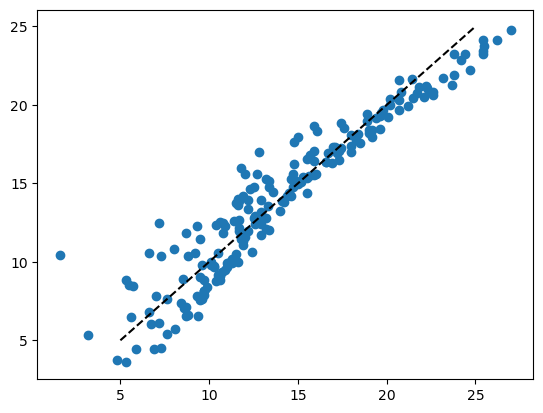

In [23]:
plt.scatter(y, yhat)
plt.show()

If the scatter points present a 45-degree line (y = x), it means our model has made a good fit.

<font color=red><b>Action</b>: Create a scatter plot and a 45-degree dash line.<font>

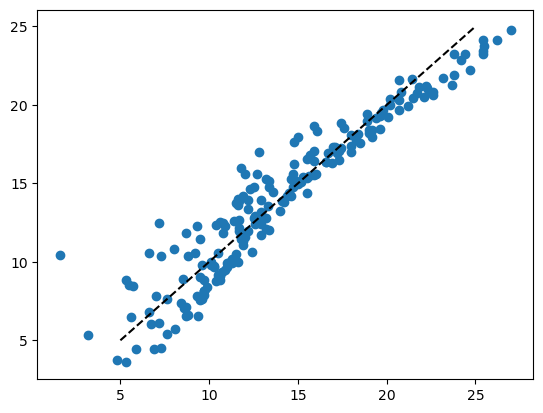

In [23]:
plt.scatter(y, yhat)
plt.plot([5, 25], [5, 25], '--', color='black')
plt.show()

## Evaluation

### Import <u>metrics</u> module from <u>sklearn</u> library

In [13]:
from sklearn import metrics

### Determine R-squared
We can use <font color=#AA0000><b>sklearn.metrics.r2_scoare()</b></font> function to compute the coefficient of determination (R-squared).<br>
It takes 2 inputs: 1) the actual label; 2) the predicted label.<br>

Swapping Input (1) and (2) will NOT affect the result.

<font color=red><b>Action</b>: Compute mean sqaured error by the imported function.<font>

In [14]:
r2_score = metrics.r2_score(y, yhat)
r2_score

0.8972106381789522

### Determine mean squared error (MSE)
We can use <font color=#AA0000><b>sklearn.metrics.mean_squared_error()</b></font> function to determine mean squared error.<br>
It takes 2 inputs: 1) the actual label; 2) the predicted label.<br>

Swapping Input (1) and (2) will NOT affect the result.

<font color=red><b>Action</b>: Determine mean sqaured error by the imported function.<font>

In [15]:
MSE = metrics.mean_squared_error(y, yhat)
MSE

2.784126314510936

### Determine mean squared error (MSE) by formula

<font color=red><b>Action</b>: Determine mean sqaured error by formula.<font>

In [16]:
MSE = ((y - yhat) ** 2).mean()
MSE

2.784126314510936

### Determine mean absolute error (MAE)

We can use <font color=#AA0000><b>sklearn.metrics.mean_absolute_error()</b></font> function to determine mean absolute error.<br>
It takes 2 inputs: 1) the actual label; 2) the predicted label.<br>

Swapping Input (1) and (2) will NOT affect the result.

<font color=red><b>Action</b>: Determine mean absolute error by the imported function and by formula.<font>

In [17]:
# Method 1
MAE1 = metrics.mean_absolute_error(y, yhat)

# Method 2
MAE2 = (y - yhat).abs().mean()

# They should be the same
print(MAE1, MAE2)

1.252011229687068 1.252011229687068


### Get the regression coefficients
We can get  the regression coefficients from model.coef_ attribute.<br>

Take note that, this is an attribute, so it is not callable by brackets, i.e. we do not write model.coef_().

<font color=red><b>Action</b>: Call the correct attribute in model.<font>

In [18]:
model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

The coefficients follow the same order as the feature input ("TV", "radio" and "newspaper").

### Get the intercept
We can get  the intercept from model.intercept_ attribute.<br>

Take note that, this is an attribute, so it is not callable by brackets, i.e. we do not write model.coef_().

<font color=red><b>Action</b>: Call the correct attribute in model.<font>

In [19]:
model.intercept_

2.9388893694594067

This is the predicted value of "sales" when TV = 0, radio = 0 and newspaper = 0.

### Create a full regression report
We will need to use statsmodels library to do that

In [20]:
import statsmodels.api as sm

In [21]:
# By default, sm does not consider the intercept term
# So, we need to add a constant into our feature set
x2 = sm.add_constant(x)

# Initialize and fit the model
model = sm.OLS(y, x2)
model = model.fit()

# display the regression report
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           1.58e-96
Time:                        14:04:44   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the second table, there is a column called "P>|t|".<br>
This column shows the p-value for each feature.<br>

We can see that, "newspaper" has a p-value of 0.860, which is far greater than 0.05.<br>
It suggests that "newspaper" is insignificant as a feature to predict "sales.<br>

"TV" and "radio" both have p-value of 0.000, so they are strong predictors.<br>

We do not consider the p-value of "const" as it is not a feature.